# 3.1 - Ingenieria de caracteristicas


**Regresion Lineal . Ecuacion de la recta**

$$y = m·x+b$$

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

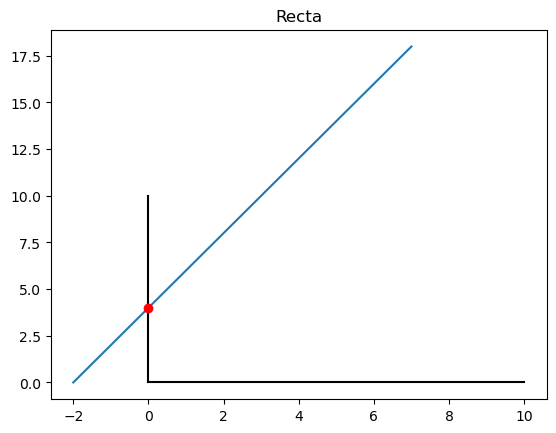

In [2]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x]

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black')
plt.plot([0,10], [0,0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

**Generalizacion de la ecuacion de la recta**

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente: $\beta = (X^{T}X)^{-1}X^{T}Y$
+ Minimos cuadrados

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [4]:
auto=pd.read_csv('../data/auto-mpg.csv')

auto.head()

mpg  cylinders  displacement  horse_power  weight  acceleration  \
0  18.0          8         307.0        130.0    3504          12.0   
1  15.0          8         350.0        165.0    3693          11.5   
2  18.0          8         318.0        150.0    3436          11.0   
3  16.0          8         304.0        150.0    3433          12.0   
4  17.0          8         302.0        140.0    3449          10.5   

   model_year                       car_name  
0          70  \t"chevrolet chevelle malibu"  
1          70          \t"buick skylark 320"  
2          70         \t"plymouth satellite"  
3          70              \t"amc rebel sst"  
4          70                \t"ford torino"

In [5]:
x=sm.add_constant(auto.acceleration)

y=auto.mpg

modelo=sm.OLS(y, x).fit()

In [6]:
pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.82e-18
Time:                        09:19:05   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

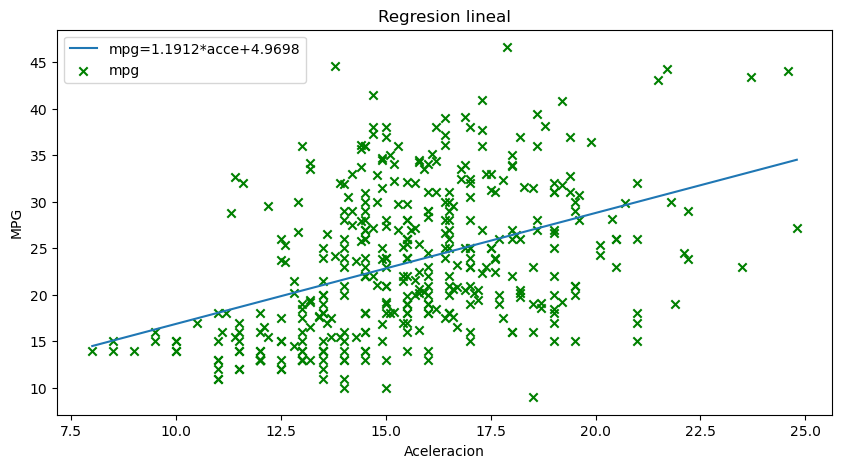

In [7]:
# plot

x=np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50)
y=1.1912*x + 4.9698

plt.figure(figsize=(10, 5))

# la recta de ajuste
plt.plot(x, y, label='mpg={}*acce+{}'.format(1.1912, 4.9698))

# datos
plt.scatter(auto.acceleration, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [29]:
# varias variables

x=sm.add_constant(auto[[
    
    #'acceleration',
    #'cylinders',
    'weight',
    #'horse_power',
    'model_year',
    #'displacement'
    
]].apply(lambda x: x.fillna(x.mean()))

)

y=auto.mpg


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Wed, 01 Mar 2023   Prob (F-statistic):          3.33e-140
Time:                        09:42:26   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.000     -22.224      -6.470
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
model_year     0.7573      0.049     15.308      0.000       0.660       0.855
==============================================================================
Omnibus:                       42.504   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.997
Skew:                           0.670   Prob(JB):                     2.32e-16
Kurtosis:                       4.616   Cond. No.                     7.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**los coeficientes, son los pesos de las caracteristicas**

In [16]:
from sklearn.linear_model import LinearRegression as LinReg

In [17]:
auto=auto.dropna()

X=auto.drop('mpg', axis=1)._get_numeric_data()

y=auto.mpg

In [18]:
modelo=LinReg()

modelo.fit(X, y)

LinearRegression()

In [19]:
modelo.intercept_   # beta0, ordenada en el origen

-14.535250480506011

In [21]:
dict(zip(X.columns, modelo.coef_))

{'cylinders': -0.3298590890739669,
 'displacement': 0.007678430243919033,
 'horse_power': -0.00039135557376072743,
 'weight': -0.0067946179133750355,
 'acceleration': 0.08527324694722943,
 'model_year': 0.7533671797501014}

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
X_norm=StandardScaler().fit_transform(X)

linreg=LinReg().fit(X_norm, y)

In [25]:
dict(zip(X.columns, linreg.coef_))

{'cylinders': -0.561949960954404,
 'displacement': 0.8024761554073669,
 'horse_power': -0.015044503769495102,
 'weight': -5.763999713309912,
 'acceleration': 0.2349570366233137,
 'model_year': 2.771664146525285}

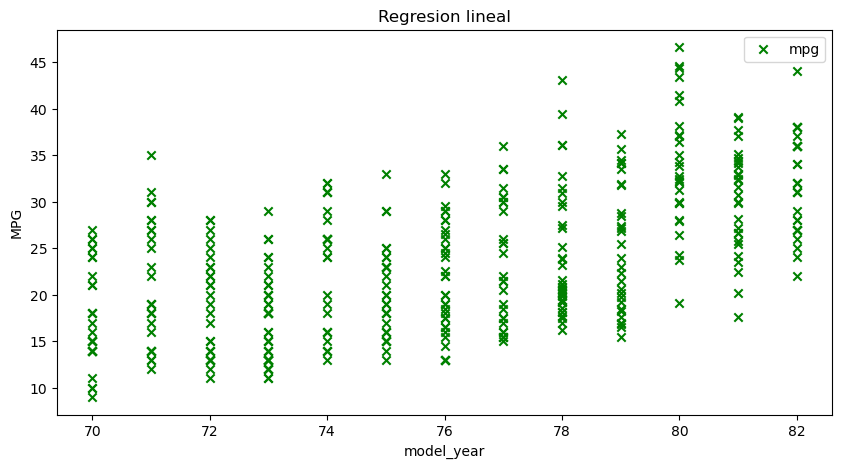

In [26]:
# plot

x=np.linspace(auto.model_year.min(), auto.model_year.max(), 50)

plt.figure(figsize=(10, 5))


# datos
plt.scatter(auto.model_year, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('model_year')
plt.ylabel('MPG')
plt.legend()
plt.show();

## Regresion Logistica


$$y=\frac{1}{1 + e^{-(\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n)}}$$

El objetivo de la regresion logistica es obtener los $\beta$.

## Decision Tree - Random Forest